In [1]:
from sunlab.environment.base.cuda import *
from sunlab.environment.base.extras import *
from sunlab.globals import FILES
from sunlab.sunflow import *

In [2]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

# Results

In [3]:
from glob import glob
glob('../../results*npy')

['../../results_threfe_ae_DLD.npy',
 '../../results_three_umap.npy',
 '../../results_three_cosinepca.npy',
 '../../results_three_linearpca.npy',
 '../../results_three_ae.npy',
 '../../results_three_vae.npy',
 '../../results_three_aae.npy',
 '../../results_three_ae_DLD.npy']

In [10]:
datum = []
for file in [ '../../results_three_umap.npy',
 '../../results_three_cosinepca.npy',
 '../../results_three_linearpca.npy',
 '../../results_three_vae.npy',
 '../../results_three_aae.npy']:
    df = pd.DataFrame(np.load(file, allow_pickle=True).item()['results'], columns=['ReLU_type', 'Depth', 'Epochs', 'TrainingTime', 'InferenceTime',
                                'TrainingMAE', 'ValidationMAE', 'TestMAE',
                                'TrainingRMSE', 'ValidationRMSE', 'TestRMSE',
                                'TrainingRMPE', 'ValidationRMPE', 'TestRMPE',])
    df['Model_base'] = file[20:-4]
    df['Model'] = df.apply(lambda x:'%s_%s_%s' % (x['Model_base'],x['Depth'],x['ReLU_type']),axis=1)
    datum.append(df.copy())
# datum

In [11]:
total_df = pd.concat(datum)
display(total_df.head())
display(total_df.tail())

,ReLU_type,Depth,Epochs,TrainingTime,InferenceTime,TrainingMAE,ValidationMAE,TestMAE,TrainingRMSE,ValidationRMSE,TestRMSE,TrainingRMPE,ValidationRMPE,TestRMPE,Model_base,Model
0,-1,-1,-1,2.564485,56.713136,0.040784,0.025787,0.042487,0.048942,0.033244,0.051230,0.082876,0.061934,0.086950,umap,umap_-1_-1
1,-1,-1,-1,3.073237,58.091352,0.040730,0.026277,0.042498,0.048916,0.033910,0.051236,0.082799,0.062939,0.086748,umap,umap_-1_-1
2,-1,-1,-1,2.886147,58.880258,0.040811,0.026100,0.042483,0.049069,0.033479,0.051201,0.083107,0.061898,0.086794,umap,umap_-1_-1
3,-1,-1,-1,2.985136,57.058375,0.040873,0.026399,0.042245,0.049011,0.033909,0.050954,0.082647,0.062813,0.086377,umap,umap_-1_-1
4,-1,-1,-1,2.959148,57.194330,0.040751,0.026580,0.042657,0.048899,0.034019,0.051324,0.082895,0.062646,0.086928,umap,umap_-1_-1


,ReLU_type,Depth,Epochs,TrainingTime,InferenceTime,TrainingMAE,ValidationMAE,TestMAE,TrainingRMSE,ValidationRMSE,TestRMSE,TrainingRMPE,ValidationRMPE,TestRMPE,Model_base,Model
76,1,2,2400,650.554517,0.004262,0.023623,0.023082,0.023563,0.033671,0.033024,0.033702,0.069856,0.068681,0.069872,aae,aae_2_1
77,2,2,2400,677.236607,0.004064,0.023412,0.022766,0.023085,0.033541,0.032670,0.033272,0.069243,0.067493,0.068918,aae,aae_2_2
78,0,3,2400,758.365520,0.004369,0.132942,0.136433,0.134150,0.409756,0.421913,0.415101,1.208315,1.244515,1.224231,aae,aae_3_0
79,1,3,2400,742.252462,0.003990,0.023721,0.023191,0.023455,0.033766,0.032989,0.033547,0.069471,0.067697,0.069180,aae,aae_3_1
80,2,3,2400,722.189280,0.003740,0.023488,0.022695,0.022954,0.033776,0.032743,0.033234,0.069575,0.067553,0.068670,aae,aae_3_2


In [12]:
total_df['ReLU'] = 'N/A'
total_df['ReLU'][total_df['ReLU_type'] == 0] = 'ReLU'
total_df['ReLU'][total_df['ReLU_type'] == 1] = 'LeakyReLU'
total_df['ReLU'][total_df['ReLU_type'] == 2] = 'ELU'
complete_df = total_df.copy()
display(total_df.head())
total_df.tail()

/tmp/4163931.3.sun-gpu.q/ipykernel_5132/1625290036.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_df['ReLU'][total_df['ReLU_type'] == 0] = 'ReLU'
/tmp/4163931.3.sun-gpu.q/ipykernel_5132/1625290036.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_df['ReLU'][total_df['ReLU_type'] == 1] = 'LeakyReLU'
/tmp/4163931.3.sun-gpu.q/ipykernel_5132/1625290036.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_df['ReLU'][

,ReLU_type,Depth,Epochs,TrainingTime,InferenceTime,TrainingMAE,ValidationMAE,TestMAE,TrainingRMSE,ValidationRMSE,TestRMSE,TrainingRMPE,ValidationRMPE,TestRMPE,Model_base,Model,ReLU
0,-1,-1,-1,2.564485,56.713136,0.040784,0.025787,0.042487,0.048942,0.033244,0.051230,0.082876,0.061934,0.086950,umap,umap_-1_-1,N/A
1,-1,-1,-1,3.073237,58.091352,0.040730,0.026277,0.042498,0.048916,0.033910,0.051236,0.082799,0.062939,0.086748,umap,umap_-1_-1,N/A
2,-1,-1,-1,2.886147,58.880258,0.040811,0.026100,0.042483,0.049069,0.033479,0.051201,0.083107,0.061898,0.086794,umap,umap_-1_-1,N/A
3,-1,-1,-1,2.985136,57.058375,0.040873,0.026399,0.042245,0.049011,0.033909,0.050954,0.082647,0.062813,0.086377,umap,umap_-1_-1,N/A
4,-1,-1,-1,2.959148,57.194330,0.040751,0.026580,0.042657,0.048899,0.034019,0.051324,0.082895,0.062646,0.086928,umap,umap_-1_-1,N/A


,ReLU_type,Depth,Epochs,TrainingTime,InferenceTime,TrainingMAE,ValidationMAE,TestMAE,TrainingRMSE,ValidationRMSE,TestRMSE,TrainingRMPE,ValidationRMPE,TestRMPE,Model_base,Model,ReLU
76,1,2,2400,650.554517,0.004262,0.023623,0.023082,0.023563,0.033671,0.033024,0.033702,0.069856,0.068681,0.069872,aae,aae_2_1,LeakyReLU
77,2,2,2400,677.236607,0.004064,0.023412,0.022766,0.023085,0.033541,0.032670,0.033272,0.069243,0.067493,0.068918,aae,aae_2_2,ELU
78,0,3,2400,758.365520,0.004369,0.132942,0.136433,0.134150,0.409756,0.421913,0.415101,1.208315,1.244515,1.224231,aae,aae_3_0,ReLU
79,1,3,2400,742.252462,0.003990,0.023721,0.023191,0.023455,0.033766,0.032989,0.033547,0.069471,0.067697,0.069180,aae,aae_3_1,LeakyReLU
80,2,3,2400,722.189280,0.003740,0.023488,0.022695,0.022954,0.033776,0.032743,0.033234,0.069575,0.067553,0.068670,aae,aae_3_2,ELU


In [13]:
total_df[total_df['Model'] == 'umap_-1_-1'].mean(axis=0)

/tmp/4163931.3.sun-gpu.q/ipykernel_5132/4090240663.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  total_df[total_df['Model'] == 'umap_-1_-1'].mean(axis=0)


ReLU_type         -1.000000
Depth             -1.000000
Epochs            -1.000000
TrainingTime       2.819363
InferenceTime     55.904311
TrainingMAE        0.040778
ValidationMAE      0.026331
TestMAE            0.042524
TrainingRMSE       0.048935
ValidationRMSE     0.033821
TestRMSE           0.051263
TrainingRMPE       0.082726
ValidationRMPE     0.062582
TestRMPE           0.086922
dtype: float64

In [14]:
total_df[total_df['Model'] == 'vae_2_1'].mean(axis=0)

/tmp/4163931.3.sun-gpu.q/ipykernel_5132/239707025.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  total_df[total_df['Model'] == 'vae_2_1'].mean(axis=0)


ReLU_type            1.000000
Depth                2.000000
Epochs            1600.000000
TrainingTime       107.295159
InferenceTime        0.001196
TrainingMAE          0.023448
ValidationMAE        0.022757
TestMAE              0.023124
TrainingRMSE         0.033826
ValidationRMSE       0.032857
TestRMSE             0.033535
TrainingRMPE         0.069923
ValidationRMPE       0.067796
TestRMPE             0.069387
dtype: float64

In [15]:
total_df[total_df['Model'] == 'aae_2_1'].mean(axis=0)

/tmp/4163931.3.sun-gpu.q/ipykernel_5132/4136234134.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  total_df[total_df['Model'] == 'aae_2_1'].mean(axis=0)


ReLU_type            1.000000
Depth                2.000000
Epochs            1600.000000
TrainingTime       428.064990
InferenceTime        0.004413
TrainingMAE          0.034799
ValidationMAE        0.034142
TestMAE              0.034433
TrainingRMSE         0.065656
ValidationRMSE       0.065013
TestRMSE             0.065155
TrainingRMPE         0.163075
ValidationRMPE       0.161917
TestRMPE             0.161814
dtype: float64

In [16]:
total_df = complete_df[(complete_df['Epochs'] == 1600)|(complete_df['Epochs'] == -1)]
# total_df = total_df[(total_df['Depth'] == 2)|(total_df['Depth'] == -1)]
total_df = total_df[(total_df['ReLU_type'] != 0)]

In [17]:
import seaborn as sns

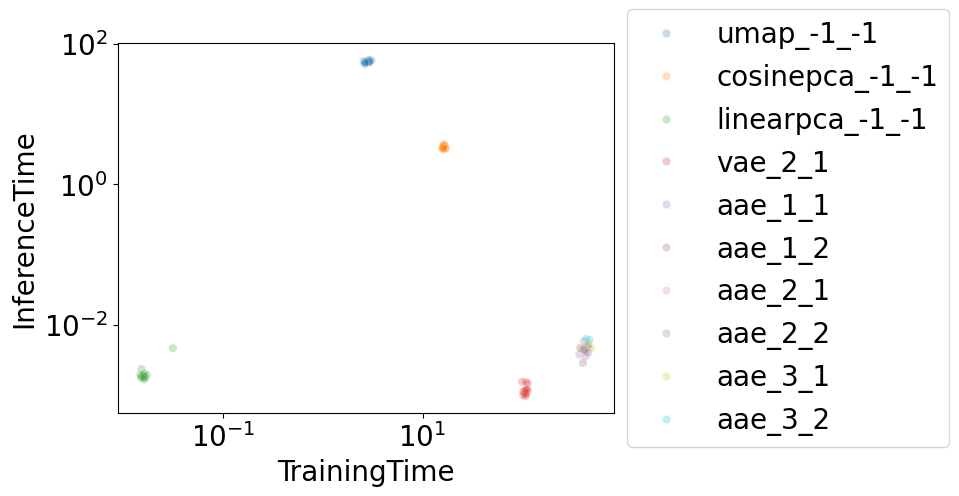

In [18]:
sns.scatterplot(data=total_df, x='TrainingTime', y='InferenceTime', hue='Model', alpha=0.25)
plt.xscale('log')
plt.yscale('log')
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.gca().legend().set_visible(False)
_ = _

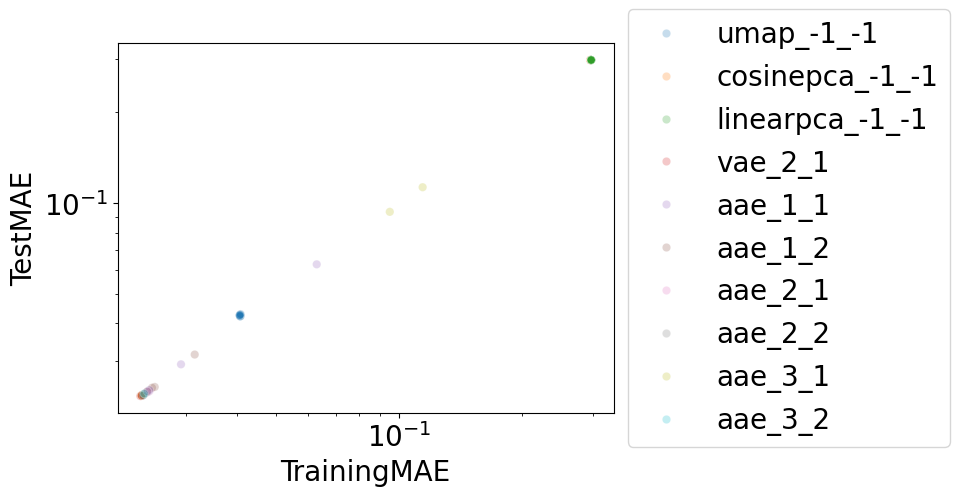

In [19]:
sns.scatterplot(data=total_df, x='TrainingMAE', y='TestMAE', hue='Model', alpha=0.25)
plt.xscale('log')
plt.yscale('log')
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.gca().legend().set_visible(False)
_ = _

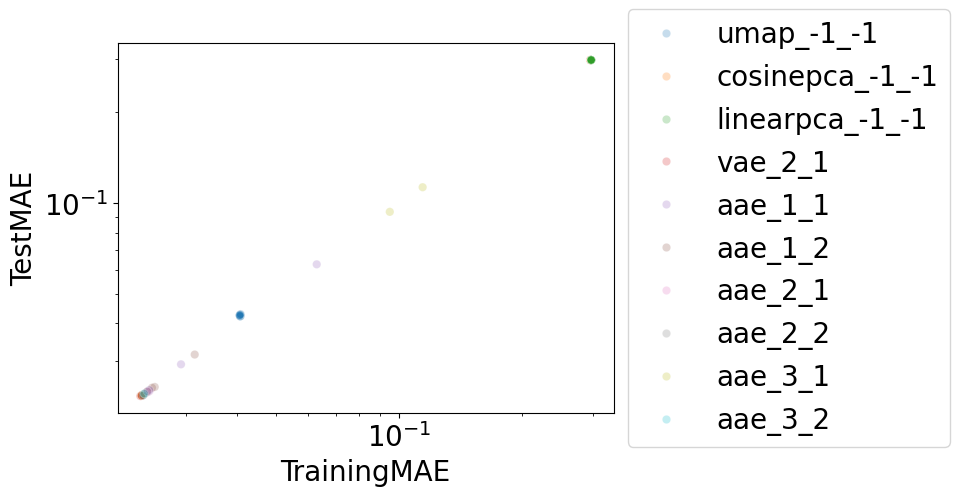

In [20]:
sns.scatterplot(data=total_df, x='TrainingMAE', y='TestMAE', hue='Model', alpha=0.25)
plt.xscale('log')
plt.yscale('log')
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.gca().legend().set_visible(False)
_ = _

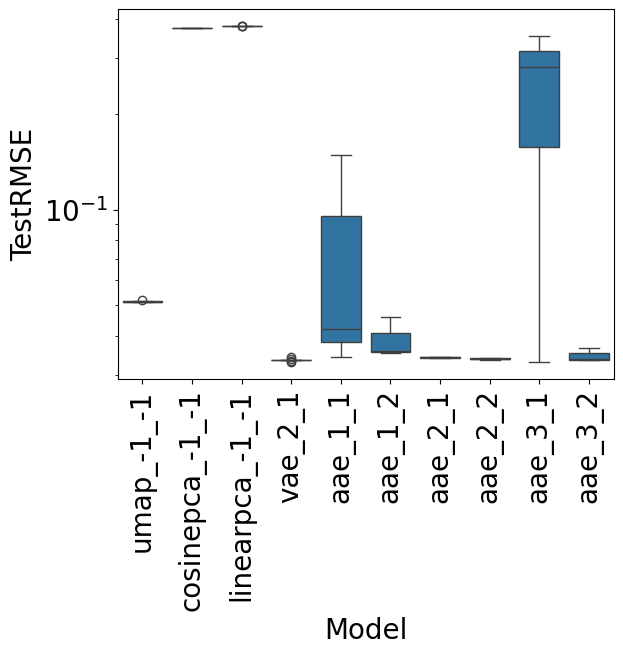

In [21]:
sns.boxplot(data=total_df, x='Model', y='TestRMSE')
plt.xticks(rotation=90)
plt.yscale('log')
_ = _

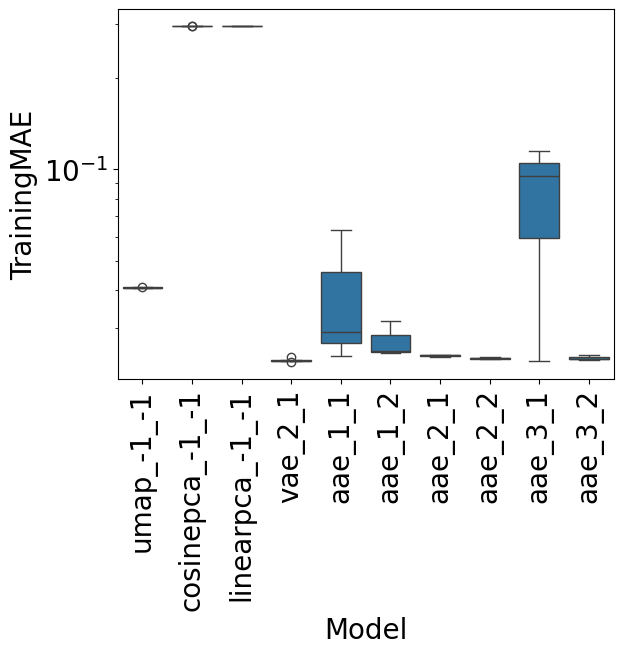

In [22]:
sns.boxplot(data=total_df, x='Model', y='TrainingMAE')
plt.yscale('log')
plt.xticks(rotation=90)
_ = _

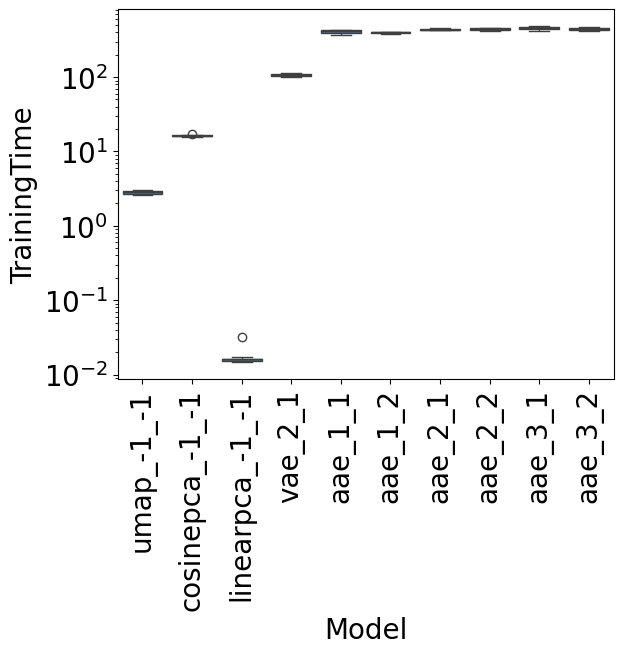

In [23]:
sns.boxplot(data=total_df, x='Model', y='TrainingTime')
plt.yscale('log')
plt.xticks(rotation=90)
_ = _

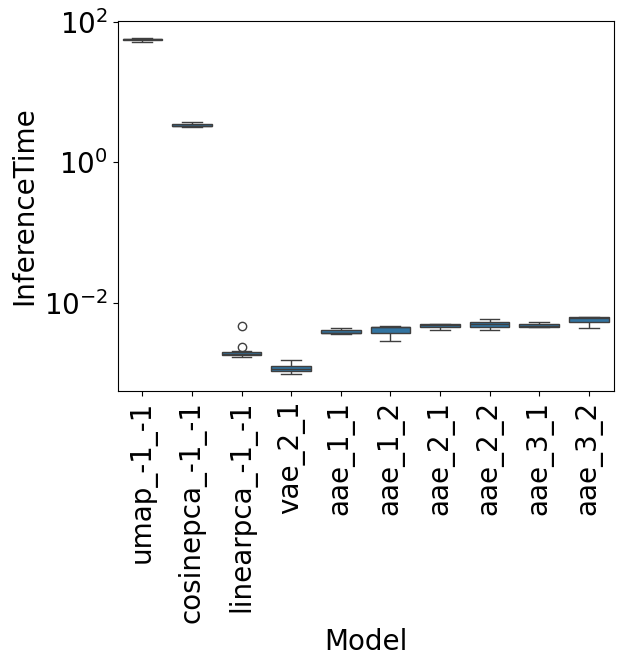

In [24]:
sns.boxplot(data=total_df, x='Model', y='InferenceTime')
plt.yscale('log')
plt.xticks(rotation=90)
_ = _

In [25]:
from scipy.stats import ttest_ind

In [26]:
from itertools import combinations

### Build Table

In [6]:
metric_string = {
    "TrainingMAE": "MAE-Train",
    "ValidationMAE": "MAE-Val",
    "TestMAE": "MAE-Test",
    "TrainingRMSE": "RMSE-Train",
    "ValidationRMSE": "RMSE-Val",
    "TestRMSE": "RMSE-Test",
    "TrainingRMPE": "RMPE-Train",
    "ValidationRMPE": "RMPE-Val",
    "TestRMPE": "RMPE-Test",
    "TrainingTime": "Training Time (s)",
    "InferenceTime": "Inference Time (ms)",
}
model_string = {
    "aae": "AAE",
    "vae": "VAE",
    "linearpca": "PCA",
    "cosinepca": "KernelPCA",
    "umap": "UMAP",
}

In [21]:
print('\\hline')
print('Metric & ' + ' & '.join(model_string.keys()) + ' \\\\')
print('\\hline')
for METRIC in metric_string.keys():
    print(f"{metric_string[METRIC]:>15} & ", end='')
    for index, model in enumerate(model_string.keys()):
        tdf = total_df[total_df['Model_base'] == model][METRIC].copy()
        if METRIC == "InferenceTime":
            print(f"${tdf.mean()*1000:8.2f} \\pm {tdf.std()*1000:8.2f}$", end='')
            if index + 1 < len(model_string.keys()):
                print(" & ", end='')
        elif METRIC == "TrainingTime":
            print(f"${tdf.mean():8.2f} \\pm {tdf.std():8.2f}$", end='')
            if index + 1 < len(model_string.keys()):
                print(" & ", end='')
        else:
            print(f"${tdf.mean():8.3f} \\pm {tdf.std():8.3f}$", end='')
            if index + 1 < len(model_string.keys()):
                print(" & ", end='')
    print(' \\\\')
    print('\\hline')

\hline
Metric & aae & vae & linearpca & cosinepca & umap \\
\hline
      MAE-Train & $   0.036 \pm    0.027$ & $   0.023 \pm    0.000$ & $   0.296 \pm    0.000$ & $   0.295 \pm    0.000$ & $   0.041 \pm    0.000$ \\
\hline
        MAE-Val & $   0.036 \pm    0.027$ & $   0.023 \pm    0.000$ & $   0.301 \pm    0.000$ & $   0.311 \pm    0.000$ & $   0.026 \pm    0.000$ \\
\hline
       MAE-Test & $   0.036 \pm    0.027$ & $   0.023 \pm    0.000$ & $   0.298 \pm    0.000$ & $   0.298 \pm    0.000$ & $   0.043 \pm    0.000$ \\
\hline
     RMSE-Train & $   0.074 \pm    0.094$ & $   0.034 \pm    0.000$ & $   0.376 \pm    0.000$ & $   0.368 \pm    0.000$ & $   0.049 \pm    0.000$ \\
\hline
       RMSE-Val & $   0.074 \pm    0.096$ & $   0.033 \pm    0.000$ & $   0.384 \pm    0.000$ & $   0.391 \pm    0.000$ & $   0.034 \pm    0.000$ \\
\hline
      RMSE-Test & $   0.073 \pm    0.093$ & $   0.034 \pm    0.000$ & $   0.380 \pm    0.000$ & $   0.373 \pm    0.000$ & $   0.051 \pm    0.000$ \\
\hli

In [22]:
print('\\hline')
print('Metric & ' + ' & '.join(model_string.keys()) + ' \\\\')
print('\\hline')
for METRIC in metric_string.keys():
    print(f"{metric_string[METRIC]:>15} & ", end='')
    for index, model in enumerate(model_string.keys()):
        tdf = total_df[total_df['Model_base'] == model][METRIC].copy()
        if METRIC == "InferenceTime":
            print(f"${tdf.min()*1000:8.2f}$", end='')
            if index + 1 < len(model_string.keys()):
                print(" & ", end='')
        elif METRIC == "TrainingTime":
            print(f"${tdf.min():8.2f}$", end='')
            if index + 1 < len(model_string.keys()):
                print(" & ", end='')
        else:
            print(f"${tdf.min():8.4f}$", end='')
            if index + 1 < len(model_string.keys()):
                print(" & ", end='')
    print(' \\\\')
    print('\\hline')

\hline
Metric & aae & vae & linearpca & cosinepca & umap \\
\hline
      MAE-Train & $  0.0234$ & $  0.0232$ & $  0.2962$ & $  0.2952$ & $  0.0407$ \\
\hline
        MAE-Val & $  0.0226$ & $  0.0225$ & $  0.3010$ & $  0.3108$ & $  0.0258$ \\
\hline
       MAE-Test & $  0.0231$ & $  0.0230$ & $  0.2985$ & $  0.2984$ & $  0.0422$ \\
\hline
     RMSE-Train & $  0.0333$ & $  0.0333$ & $  0.3761$ & $  0.3681$ & $  0.0488$ \\
\hline
       RMSE-Val & $  0.0324$ & $  0.0325$ & $  0.3845$ & $  0.3908$ & $  0.0332$ \\
\hline
      RMSE-Test & $  0.0331$ & $  0.0331$ & $  0.3798$ & $  0.3731$ & $  0.0509$ \\
\hline
     RMPE-Train & $  0.0689$ & $  0.0691$ & $  0.6781$ & $  0.6549$ & $  0.0823$ \\
\hline
       RMPE-Val & $  0.0670$ & $  0.0671$ & $  0.6966$ & $  0.6989$ & $  0.0617$ \\
\hline
      RMPE-Test & $  0.0683$ & $  0.0685$ & $  0.6861$ & $  0.6652$ & $  0.0864$ \\
\hline
Training Time (s) & $  372.35$ & $   99.67$ & $    0.01$ & $   15.76$ & $    2.56$ \\
\hline
Inference Time (ms) &

In [23]:
METRIC = 'TestMAE'

In [24]:
for _key in np.unique(total_df['Model_base']):
    tdf = total_df.copy()[total_df['Model_base'] == _key]
    tdf = tdf[METRIC]
    cm, cs = tdf.mean(), tdf.std()
    cmi, cma = tdf.min(), tdf.max()
    print(f"{_key:>20}: {cm:5.3f} ± {cs:5.3f}  [{cmi:5.3f},{cma:5.3f}]")

                 aae: 0.036 ± 0.027  [0.023,0.113]
           cosinepca: 0.298 ± 0.000  [0.298,0.298]
           linearpca: 0.298 ± 0.000  [0.298,0.298]
                umap: 0.043 ± 0.000  [0.042,0.043]
                 vae: 0.023 ± 0.000  [0.023,0.024]


In [25]:
METRIC='ValidationRMPE'
METRIC='ValidationRMPE'
SIGNIFICANCE_LEVEL = 0.05

In [38]:
from matplotlib.colors import ListedColormap

In [119]:
SIGNIFICANCE_LEVEL = 0.05

In [120]:
METRICS = metric_string.keys()
MODELS = np.array(['aae', 'vae', 'umap', 'cosinepca', 'linearpca'])#np.unique(total_df['Model_base'])

In [121]:
print(MODELS)
print(METRICS)

['aae' 'vae' 'umap' 'cosinepca' 'linearpca']
dict_keys(['TrainingMAE', 'ValidationMAE', 'TestMAE', 'TrainingRMSE', 'ValidationRMSE', 'TestRMSE', 'TrainingRMPE', 'ValidationRMPE', 'TestRMPE', 'TrainingTime', 'InferenceTime'])


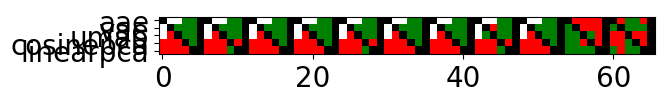

In [122]:
PADDING = 1
visual_result = np.zeros((MODELS.shape[0],(MODELS.shape[0]+PADDING)*len(METRICS))) * np.NaN
for left_index, right_index in combinations(range(MODELS.shape[0]), 2):
    left = total_df[total_df['Model_base'] == MODELS[left_index]]
    right = total_df[total_df['Model_base'] == MODELS[right_index]]
    for xidx, METRIC in enumerate(METRICS):
        Xindex = xidx*(MODELS.shape[0]+PADDING) + right_index
        Yindex = left_index
        args = (left[METRIC], right[METRIC],)
        res = ttest_ind(*args)
        if res.pvalue < SIGNIFICANCE_LEVEL:
            res_l = ttest_ind(*args, alternative='less')
            res_g = ttest_ind(*args, alternative='greater')
            if res_l.pvalue < SIGNIFICANCE_LEVEL:
                visual_result[Yindex, Xindex] = -1
            elif res_g.pvalue < SIGNIFICANCE_LEVEL:
                visual_result[Yindex, Xindex] = 1
        else:
            visual_result[Yindex, Xindex] = 0


        Xindex = xidx*(MODELS.shape[0]+PADDING) + left_index
        Yindex = right_index
        args = (right[METRIC], left[METRIC],)
        res = ttest_ind(*args)
        if res.pvalue < SIGNIFICANCE_LEVEL:
            res_l = ttest_ind(*args, alternative='less')
            res_g = ttest_ind(*args, alternative='greater')
            if res_l.pvalue < SIGNIFICANCE_LEVEL:
                visual_result[Yindex, Xindex] = -1
            elif res_g.pvalue < SIGNIFICANCE_LEVEL:
                visual_result[Yindex, Xindex] = 1
        else:
            visual_result[Yindex, Xindex] = 0

cm = ListedColormap(['green','white','red'])
cm.set_bad(color="black")
plt.imshow(visual_result, cmap=cm, vmin=-1, vmax=1)
plt.yticks(range(5),MODELS)
_ = _

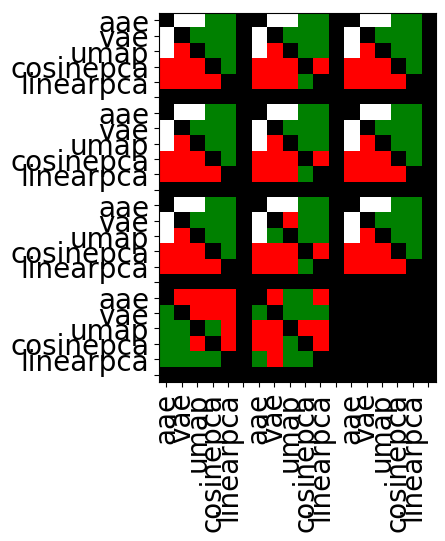

In [124]:
vr = np.zeros((visual_result.shape[0]*4+4*PADDING,(visual_result.shape[1]+len(MODELS)+PADDING)//4)) * np.NaN
for i in range(len(METRICS)):
    I = i%(vr.shape[1]//(len(MODELS)+PADDING))
    J = i//(vr.shape[1]//(len(MODELS)+PADDING))
    vr[J*(MODELS.shape[0]+PADDING):(J+1)*(MODELS.shape[0]+PADDING)-PADDING,I*(MODELS.shape[0]+PADDING):(I+1)*(MODELS.shape[0]+PADDING)] = visual_result[:,(MODELS.shape[0]+PADDING)*(i+0):(MODELS.shape[0]+PADDING)*(i+1)]
plt.imshow(vr, cmap=cm, vmin=-1, vmax=1)
plt.xticks(range((len(MODELS)+1)*3), (MODELS.tolist() + [''])*3, rotation=90)
plt.yticks(range((len(MODELS)+1)*4), (MODELS.tolist() + [''])*4)
_=_

In [26]:
for left, right in combinations(np.unique(total_df['Model_base']), 2):
    # Are the means different?
    res = ttest_ind(total_df[total_df['Model_base'] == left][METRIC],
                    total_df[total_df['Model_base'] == right][METRIC])
    if res.pvalue < SIGNIFICANCE_LEVEL:
        # Is the left mean smaller?
        if ttest_ind(total_df[total_df['Model_base'] == left][METRIC],
                        total_df[total_df['Model_base'] == right][METRIC],
                       alternative='less').pvalue < SIGNIFICANCE_LEVEL:
            res = ttest_ind(total_df[total_df['Model_base'] == left][METRIC],
                        total_df[total_df['Model_base'] == right][METRIC],
                       alternative='less')
            print(f"{left:>15} < {right:>15} p={res.pvalue:9.2e}")
        # Is the left mean larger?
        elif ttest_ind(total_df[total_df['Model_base'] == left][METRIC],
                        total_df[total_df['Model_base'] == right][METRIC],
                       alternative='greater').pvalue < SIGNIFICANCE_LEVEL:
            res = ttest_ind(total_df[total_df['Model_base'] == left][METRIC],
                        total_df[total_df['Model_base'] == right][METRIC],
                       alternative='greater')
            print(f"{left:>15} > {right:>15} p={res.pvalue:9.2e}")
        else:
            print(f"{left:>15} ≠ {right:>15} p={res.pvalue:9.2e}")
    else:
        print(f"{left:>15} = {right:>15} p={res.pvalue:9.2e}")

            aae <       cosinepca p= 1.04e-06
            aae <       linearpca p= 1.12e-06
            aae =            umap p= 1.40e-01
            aae =             vae p= 1.56e-01
      cosinepca >       linearpca p=6.64e-272
      cosinepca >            umap p= 6.50e-66
      cosinepca >             vae p= 2.85e-69
      linearpca >            umap p= 7.04e-66
      linearpca >             vae p= 3.09e-69
           umap <             vae p= 2.91e-18


In [127]:
aae_df = total_df[total_df['Model_base'] == 'aae'].copy()

In [128]:
model_testing_df = complete_df[(complete_df['Epochs'] == 1600)|(complete_df['Epochs'] == -1)]

In [129]:
aae_df = model_testing_df[model_testing_df['Model_base'] == 'aae']

### Depth

In [130]:
data = []
for depth in range(1,3+1):
    subdf = aae_df[aae_df['Depth'] == depth]
    data.append(np.hstack([subdf.columns.to_numpy()[:14,np.newaxis],subdf.mean().to_numpy()[:,np.newaxis],subdf.std().to_numpy()[:,np.newaxis]])[...,np.newaxis])
data = np.dstack(data)

/tmp/4163931.3.sun-gpu.q/ipykernel_5132/382936771.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.append(np.hstack([subdf.columns.to_numpy()[:14,np.newaxis],subdf.mean().to_numpy()[:,np.newaxis],subdf.std().to_numpy()[:,np.newaxis]])[...,np.newaxis])


In [131]:
# [Data column, [Name, Mean, Std], Trial]
print(f"{'Metric':30} & Depth-1 & Depth-2 & Depth-3 \\\\")
for i,n in enumerate(data[:,0,0]):
    if n in ['ReLU_type','Depth','Epochs']:
        continue
    print(f"{data[i,0,0]:30} ", end="")
    fmt = ".2f"
    rescaler = 100
    if n in ['TrainingTime']:
        rescaler = 1
        fmt = ".0f"
    elif n in ['InferenceTime']:
        rescaler = 1000
        fmt = ".2f"
    for trial in range(3):
        print(f"& ${data[i,1,trial]*rescaler:{fmt}} \pm {data[i,2,trial]*rescaler:{fmt}}$ ", end='')
    print("\\\\")

Metric                         & Depth-1 & Depth-2 & Depth-3 \\
TrainingTime                   & $407 \pm 25$ & $441 \pm 19$ & $445 \pm 24$ \\
InferenceTime                  & $4.04 \pm 0.62$ & $4.89 \pm 0.89$ & $5.19 \pm 0.75$ \\
TrainingMAE                    & $4.08 \pm 2.18$ & $3.89 \pm 3.09$ & $6.37 \pm 6.05$ \\
ValidationMAE                  & $4.09 \pm 2.23$ & $3.94 \pm 3.37$ & $6.48 \pm 6.34$ \\
TestMAE                        & $4.05 \pm 2.18$ & $3.86 \pm 3.13$ & $6.34 \pm 6.09$ \\
TrainingRMSE                   & $8.12 \pm 6.55$ & $8.16 \pm 9.97$ & $14.66 \pm 15.57$ \\
ValidationRMSE                 & $8.20 \pm 6.69$ & $8.50 \pm 10.97$ & $14.97 \pm 16.06$ \\
TestRMSE                       & $8.08 \pm 6.49$ & $8.17 \pm 10.10$ & $14.61 \pm 15.55$ \\
TrainingRMPE                   & $21.35 \pm 20.29$ & $21.49 \pm 30.37$ & $38.49 \pm 42.57$ \\
ValidationRMPE                 & $21.63 \pm 20.73$ & $22.63 \pm 33.35$ & $39.11 \pm 43.29$ \\
TestRMPE                       & $21.23 \pm 2

In [132]:
for METRIC in ['TrainingTime', 'InferenceTime',
       'TrainingMAE', 'ValidationMAE', 'TestMAE', 'TrainingRMSE',
       'ValidationRMSE', 'TestRMSE', 'TrainingRMPE', 'ValidationRMPE',
       'TestRMPE']:
    print(METRIC)
    for left, right in combinations(np.unique(aae_df['Depth']), 2):
        # Are the means different?
        res = ttest_ind(aae_df[aae_df['Depth'] == left][METRIC],
                        aae_df[aae_df['Depth'] == right][METRIC])
        if res.pvalue < SIGNIFICANCE_LEVEL:
            # Is the left mean smaller?
            if ttest_ind(aae_df[aae_df['Depth'] == left][METRIC],
                            aae_df[aae_df['Depth'] == right][METRIC],
                           alternative='less').pvalue < SIGNIFICANCE_LEVEL:
                res = ttest_ind(aae_df[aae_df['Depth'] == left][METRIC],
                            aae_df[aae_df['Depth'] == right][METRIC],
                           alternative='less')
                print(f"{left:>15} < {right:>15} p={res.pvalue:9.2e}")
            # Is the left mean larger?
            elif ttest_ind(aae_df[aae_df['Depth'] == left][METRIC],
                            aae_df[aae_df['Depth'] == right][METRIC],
                           alternative='greater').pvalue < SIGNIFICANCE_LEVEL:
                res = ttest_ind(aae_df[aae_df['Depth'] == left][METRIC],
                            aae_df[aae_df['Depth'] == right][METRIC],
                           alternative='greater')
                print(f"{left:>15} > {right:>15} p={res.pvalue:9.2e}")
            else:
                print(f"{left:>15} ≠ {right:>15} p={res.pvalue:9.2e}")
        else:
            print(f"{left:>15} = {right:>15} p={res.pvalue:9.2e}")

TrainingTime
              1 <               2 p= 2.33e-03
              1 <               3 p= 2.06e-03
              2 =               3 p= 6.54e-01
InferenceTime
              1 <               2 p= 1.57e-02
              1 <               3 p= 1.29e-03
              2 =               3 p= 4.49e-01
TrainingMAE
              1 =               2 p= 8.78e-01
              1 =               3 p= 3.01e-01
              2 =               3 p= 2.88e-01
ValidationMAE
              1 =               2 p= 9.14e-01
              1 =               3 p= 3.01e-01
              2 =               3 p= 3.04e-01
TestMAE
              1 =               2 p= 8.86e-01
              1 =               3 p= 3.03e-01
              2 =               3 p= 2.93e-01
TrainingRMSE
              1 =               2 p= 9.93e-01
              1 =               3 p= 2.63e-01
              2 =               3 p= 3.07e-01
ValidationRMSE
              1 =               2 p= 9.44e-01
              1 =               3 p= 

In [133]:
from matplotlib.colors import ListedColormap

In [134]:
SIGNIFICANCE_LEVEL = 0.05

In [138]:
METRICS = metric_string.keys()
MODELS = np.array([1,2,3])

In [139]:
print(MODELS)
print(METRICS)

[1 2 3]
dict_keys(['TrainingMAE', 'ValidationMAE', 'TestMAE', 'TrainingRMSE', 'ValidationRMSE', 'TestRMSE', 'TrainingRMPE', 'ValidationRMPE', 'TestRMPE', 'TrainingTime', 'InferenceTime'])


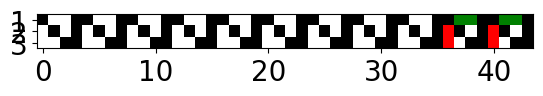

In [141]:
PADDING = 1
visual_result = np.zeros((MODELS.shape[0],(MODELS.shape[0]+PADDING)*len(METRICS))) * np.NaN
for left_index, right_index in combinations(range(MODELS.shape[0]), 2):
    left = aae_df[aae_df['Depth'] == MODELS[left_index]]
    right = aae_df[aae_df['Depth'] == MODELS[right_index]]
    for xidx, METRIC in enumerate(METRICS):
        Xindex = xidx*(MODELS.shape[0]+PADDING) + right_index
        Yindex = left_index
        args = (left[METRIC], right[METRIC],)
        res = ttest_ind(*args)
        if res.pvalue < SIGNIFICANCE_LEVEL:
            res_l = ttest_ind(*args, alternative='less')
            res_g = ttest_ind(*args, alternative='greater')
            if res_l.pvalue < SIGNIFICANCE_LEVEL:
                visual_result[Yindex, Xindex] = -1
            elif res_g.pvalue < SIGNIFICANCE_LEVEL:
                visual_result[Yindex, Xindex] = 1
        else:
            visual_result[Yindex, Xindex] = 0


        Xindex = xidx*(MODELS.shape[0]+PADDING) + left_index
        Yindex = right_index
        args = (right[METRIC], left[METRIC],)
        res = ttest_ind(*args)
        if res.pvalue < SIGNIFICANCE_LEVEL:
            res_l = ttest_ind(*args, alternative='less')
            res_g = ttest_ind(*args, alternative='greater')
            if res_l.pvalue < SIGNIFICANCE_LEVEL:
                visual_result[Yindex, Xindex] = -1
            elif res_g.pvalue < SIGNIFICANCE_LEVEL:
                visual_result[Yindex, Xindex] = 1
        else:
            visual_result[Yindex, Xindex] = 0

cm = ListedColormap(['green','white','red'])
cm.set_bad(color="black")
plt.imshow(visual_result, cmap=cm, vmin=-1, vmax=1)
plt.yticks(range(len(MODELS)),MODELS)
_ = _

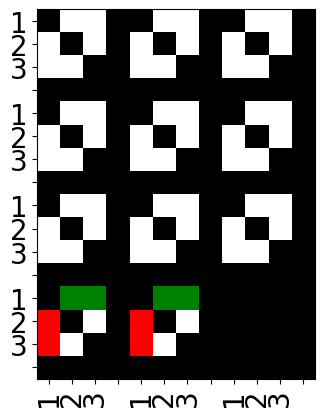

In [143]:
vr = np.zeros((visual_result.shape[0]*4+4*PADDING,(visual_result.shape[1]+len(MODELS)+PADDING)//4)) * np.NaN
for i in range(len(METRICS)):
    I = i%(vr.shape[1]//(len(MODELS)+PADDING))
    J = i//(vr.shape[1]//(len(MODELS)+PADDING))
    vr[J*(MODELS.shape[0]+PADDING):(J+1)*(MODELS.shape[0]+PADDING)-PADDING,I*(MODELS.shape[0]+PADDING):(I+1)*(MODELS.shape[0]+PADDING)] = visual_result[:,(MODELS.shape[0]+PADDING)*(i+0):(MODELS.shape[0]+PADDING)*(i+1)]
plt.imshow(vr, cmap=cm, vmin=-1, vmax=1)
plt.xticks(range((len(MODELS)+1)*3), (MODELS.tolist() + [''])*3, rotation=90)
plt.yticks(range((len(MODELS)+1)*4), (MODELS.tolist() + [''])*4)
_=_

### ReLU Type

In [105]:
data = []
for relu_type in range(3):
    subdf = aae_df[aae_df['ReLU_type'] == relu_type]
    data.append(np.hstack([subdf.columns.to_numpy()[:14,np.newaxis],subdf.mean().to_numpy()[:,np.newaxis],subdf.std().to_numpy()[:,np.newaxis]])[...,np.newaxis])
data = np.dstack(data)

/tmp/4158717.2.sun-gpu.q/ipykernel_13331/1372248133.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.append(np.hstack([subdf.columns.to_numpy()[:14,np.newaxis],subdf.mean().to_numpy()[:,np.newaxis],subdf.std().to_numpy()[:,np.newaxis]])[...,np.newaxis])


In [107]:
# [Data column, [Name, Mean, Std], Trial]
print(f"{'Metric':30} & ReLU & LeakyReLU & ELU \\\\")
for i,n in enumerate(data[:,0,0]):
    if n in ['ReLU_type','Depth','Epochs']:
        continue
    print(f"{data[i,0,0]:30} ", end="")
    fmt = ".2f"
    rescaler = 100
    if n in ['TrainingTime']:
        rescaler = 1
        fmt = ".0f"
    elif n in ['InferenceTime']:
        rescaler = 1000
        fmt = ".2f"
    for trial in range(3):
        print(f"& ${data[i,1,trial]*rescaler:{fmt}} \pm {data[i,2,trial]*rescaler:{fmt}}$ ", end='')
    print("\\\\")

Metric                         & ReLU & LeakyReLU & ELU
TrainingTime                   & $430 \pm 24$ & $436 \pm 32$ & $426 \pm 29$ \\
InferenceTime                  & $4.85 \pm 0.96$ & $4.43 \pm 0.56$ & $4.84 \pm 1.09$ \\
TrainingMAE                    & $7.15 \pm 5.51$ & $4.69 \pm 3.54$ & $2.50 \pm 0.25$ \\
ValidationMAE                  & $7.37 \pm 5.86$ & $4.69 \pm 3.61$ & $2.46 \pm 0.29$ \\
TestMAE                        & $7.15 \pm 5.58$ & $4.64 \pm 3.50$ & $2.46 \pm 0.26$ \\
TrainingRMSE                   & $16.23 \pm 13.03$ & $11.11 \pm 12.48$ & $3.60 \pm 0.36$ \\
ValidationRMSE                 & $16.88 \pm 13.89$ & $11.24 \pm 12.74$ & $3.55 \pm 0.43$ \\
TestRMSE                       & $16.23 \pm 13.14$ & $11.04 \pm 12.40$ & $3.58 \pm 0.39$ \\
TrainingRMPE                   & $43.34 \pm 34.12$ & $30.52 \pm 38.17$ & $7.46 \pm 0.83$ \\
ValidationRMPE                 & $44.97 \pm 36.16$ & $30.99 \pm 38.90$ & $7.40 \pm 1.08$ \\
TestRMPE                       & $43.18 \pm 34.16$ & 

In [113]:
for METRIC in ['TrainingTime', 'InferenceTime',
       'TrainingMAE', 'ValidationMAE', 'TestMAE', 'TrainingRMSE',
       'ValidationRMSE', 'TestRMSE', 'TrainingRMPE', 'ValidationRMPE',
       'TestRMPE']:
    print(METRIC)
    for left, right in combinations(np.unique(aae_df['ReLU']), 2):
        # Are the means different?
        res = ttest_ind(aae_df[aae_df['ReLU'] == left][METRIC],
                        aae_df[aae_df['ReLU'] == right][METRIC])
        if res.pvalue < SIGNIFICANCE_LEVEL:
            # Is the left mean smaller?
            if ttest_ind(aae_df[aae_df['ReLU'] == left][METRIC],
                            aae_df[aae_df['ReLU'] == right][METRIC],
                           alternative='less').pvalue < SIGNIFICANCE_LEVEL:
                res = ttest_ind(aae_df[aae_df['ReLU'] == left][METRIC],
                            aae_df[aae_df['ReLU'] == right][METRIC],
                           alternative='less')
                print(f"{left:>15} < {right:>15} p={res.pvalue:9.2e}")
            # Is the left mean larger?
            elif ttest_ind(aae_df[aae_df['ReLU'] == left][METRIC],
                            aae_df[aae_df['ReLU'] == right][METRIC],
                           alternative='greater').pvalue < SIGNIFICANCE_LEVEL:
                res = ttest_ind(aae_df[aae_df['ReLU'] == left][METRIC],
                            aae_df[aae_df['ReLU'] == right][METRIC],
                           alternative='greater')
                print(f"{left:>15} > {right:>15} p={res.pvalue:9.2e}")
            else:
                print(f"{left:>15} ≠ {right:>15} p={res.pvalue:9.2e}")
        else:
            print(f"{left:>15} = {right:>15} p={res.pvalue:9.2e}")

TrainingTime
            ELU =       LeakyReLU p= 4.85e-01
            ELU =            ReLU p= 7.14e-01
      LeakyReLU =            ReLU p= 6.79e-01
InferenceTime
            ELU =       LeakyReLU p= 3.34e-01
            ELU =            ReLU p= 9.86e-01
      LeakyReLU =            ReLU p= 2.78e-01
TrainingMAE
            ELU =       LeakyReLU p= 8.27e-02
            ELU <            ReLU p= 1.12e-02
      LeakyReLU =            ReLU p= 2.76e-01
ValidationMAE
            ELU =       LeakyReLU p= 8.28e-02
            ELU <            ReLU p= 1.15e-02
      LeakyReLU =            ReLU p= 2.60e-01
TestMAE
            ELU =       LeakyReLU p= 8.20e-02
            ELU <            ReLU p= 1.14e-02
      LeakyReLU =            ReLU p= 2.69e-01
TrainingRMSE
            ELU =       LeakyReLU p= 9.02e-02
            ELU <            ReLU p= 5.13e-03
      LeakyReLU =            ReLU p= 4.07e-01
ValidationRMSE
            ELU =       LeakyReLU p= 8.91e-02
            ELU <            ReLU p= 

In [133]:
from matplotlib.colors import ListedColormap

In [144]:
SIGNIFICANCE_LEVEL = 0.05

In [145]:
METRICS = metric_string.keys()
MODELS = np.unique(aae_df['ReLU'])

In [146]:
print(MODELS)
print(METRICS)

['ELU' 'LeakyReLU' 'ReLU']
dict_keys(['TrainingMAE', 'ValidationMAE', 'TestMAE', 'TrainingRMSE', 'ValidationRMSE', 'TestRMSE', 'TrainingRMPE', 'ValidationRMPE', 'TestRMPE', 'TrainingTime', 'InferenceTime'])


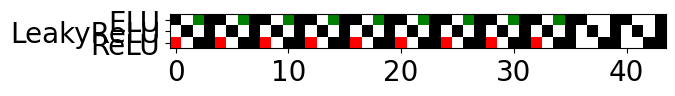

In [147]:
PADDING = 1
visual_result = np.zeros((MODELS.shape[0],(MODELS.shape[0]+PADDING)*len(METRICS))) * np.NaN
for left_index, right_index in combinations(range(MODELS.shape[0]), 2):
    left = aae_df[aae_df['ReLU'] == MODELS[left_index]]
    right = aae_df[aae_df['ReLU'] == MODELS[right_index]]
    for xidx, METRIC in enumerate(METRICS):
        Xindex = xidx*(MODELS.shape[0]+PADDING) + right_index
        Yindex = left_index
        args = (left[METRIC], right[METRIC],)
        res = ttest_ind(*args)
        if res.pvalue < SIGNIFICANCE_LEVEL:
            res_l = ttest_ind(*args, alternative='less')
            res_g = ttest_ind(*args, alternative='greater')
            if res_l.pvalue < SIGNIFICANCE_LEVEL:
                visual_result[Yindex, Xindex] = -1
            elif res_g.pvalue < SIGNIFICANCE_LEVEL:
                visual_result[Yindex, Xindex] = 1
        else:
            visual_result[Yindex, Xindex] = 0


        Xindex = xidx*(MODELS.shape[0]+PADDING) + left_index
        Yindex = right_index
        args = (right[METRIC], left[METRIC],)
        res = ttest_ind(*args)
        if res.pvalue < SIGNIFICANCE_LEVEL:
            res_l = ttest_ind(*args, alternative='less')
            res_g = ttest_ind(*args, alternative='greater')
            if res_l.pvalue < SIGNIFICANCE_LEVEL:
                visual_result[Yindex, Xindex] = -1
            elif res_g.pvalue < SIGNIFICANCE_LEVEL:
                visual_result[Yindex, Xindex] = 1
        else:
            visual_result[Yindex, Xindex] = 0

cm = ListedColormap(['green','white','red'])
cm.set_bad(color="black")
plt.imshow(visual_result, cmap=cm, vmin=-1, vmax=1)
plt.yticks(range(len(MODELS)),MODELS)
_ = _

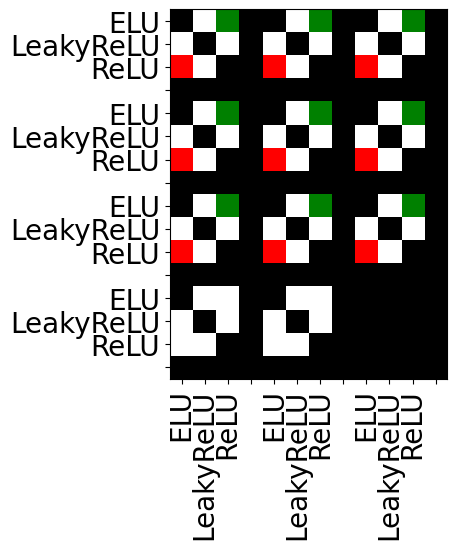

In [149]:
vr = np.zeros((visual_result.shape[0]*4+4*PADDING,(visual_result.shape[1]+len(MODELS)+PADDING)//4)) * np.NaN
for i in range(len(METRICS)):
    I = i%(vr.shape[1]//(len(MODELS)+PADDING))
    J = i//(vr.shape[1]//(len(MODELS)+PADDING))
    vr[J*(MODELS.shape[0]+PADDING):(J+1)*(MODELS.shape[0]+PADDING)-PADDING,I*(MODELS.shape[0]+PADDING):(I+1)*(MODELS.shape[0]+PADDING)] = visual_result[:,(MODELS.shape[0]+PADDING)*(i+0):(MODELS.shape[0]+PADDING)*(i+1)]
plt.imshow(vr, cmap=cm, vmin=-1, vmax=1)
plt.xticks(range((len(MODELS)+1)*3), (MODELS.tolist() + [''])*3, rotation=90)
plt.yticks(range((len(MODELS)+1)*4), (MODELS.tolist() + [''])*4)
_=_

# Classification Results

In [5]:
from glob import glob

In [224]:
assert False, "Don't overwrite"

AssertionError: Don't overwrite

In [15]:
classification_dataset_dict = np.load(DIR_ROOT + "extra_data/ClassificationTestingDataset.npy", allow_pickle=True).item()
classification_labels = classification_dataset_dict['true_labels']

In [150]:
class_data = {}
for file in glob("../../*_classified.npy"):
    class_data[file[len("../../classification_results_"):-len(".npy_classified.npy")]] = np.load(file)
class_data.keys()

dict_keys(['vae', 'aae', 'umap', 'linearpca', 'cosinepca'])

In [226]:
for _key in class_data.keys():
    true_labels = np.repeat(classification_labels[np.newaxis,...], class_data[_key].shape[0], axis=0)
    class_accuracy = np.sum(np.argmax(class_data[_key], axis=-1) == true_labels, axis=-1)/class_data[_key].shape[1]
    cm,cs = class_accuracy.mean(), class_accuracy.std()
    cmi,cma = class_accuracy.min(), class_accuracy.max()
    print(f"{_key:>20}: {cm*100:.1f} ± {cs*100:.1f}  [{cmi*100:.1f},{cma*100:.1f}]")

                 vae: 81.3 ± 0.3  [80.6,81.6]
                 aae: 81.6 ± 0.4  [81.3,82.2]
                umap: 50.5 ± 0.3  [50.1,51.1]
           linearpca: 32.8 ± 0.0  [32.8,32.8]
           cosinepca: 19.5 ± 0.0  [19.5,19.5]
